In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [4]:
welfare.head().T

,0,1,2,3,4
h14_id,2.0,3.0,4.0,6.0,6.0
h14_ind,1.0,1.0,1.0,1.0,1.0
h14_sn,1.0,1.0,1.0,1.0,1.0
h14_merkey,20101.0,30101.0,40101.0,60101.0,60101.0
h_new,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
h14_pers_income1,NaN,NaN,NaN,2304.0,NaN
h14_pers_income2,NaN,NaN,1284.0,NaN,NaN
h14_pers_income3,NaN,NaN,NaN,1800.0,NaN
h14_pers_income4,0.0,0.0,0.0,0.0,0.0


In [5]:
welfare.shape

(14418, 830)

In [6]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [7]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [8]:
welfare = welfare.rename(
    columns = {
        'h14_g3': 'sex',
        'h14_g4': 'birth',
        'h14_g10': 'marriage_type',
        'h14_g11': 'religion',
        'p1402_8aq1': 'income',
        'h14_eco9': 'code_job',
        'h14_reg7': 'code_region'
    })

## 2. 성별에 따른 월급 차이
- Q. 성별에 따라 월급이 다를까?

In [9]:
welfare['sex'].dtypes

dtype('float64')

In [10]:
welfare['sex'].value_counts() # 1은 남자, 2는 여자 / 9는 모름 또는 무응답

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [11]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [12]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

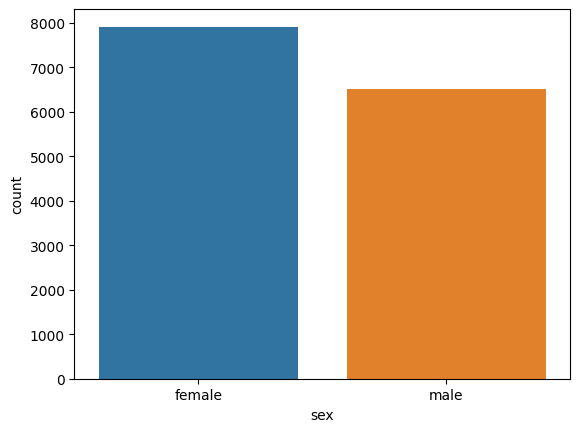

In [13]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x='sex')

In [14]:
# 변수 검토하기
welfare['income'].dtypes # 변수 타입 확인

dtype('float64')

In [15]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

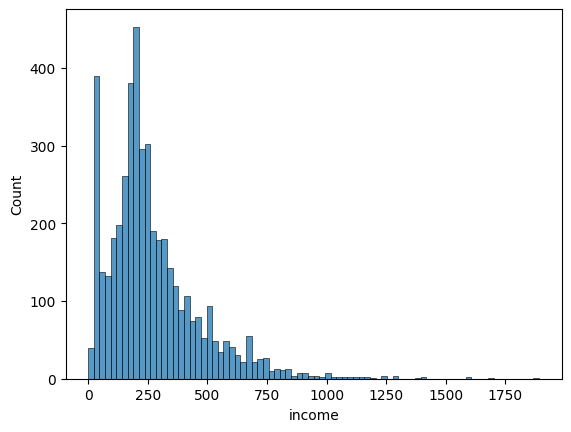

In [16]:
sns.histplot(data = welfare, x='income')

In [17]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [18]:
welfare['income'].isna().sum()

9884

In [19]:
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")

income 변수의 missing value: 68.55%


In [20]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
print(welfare['income'].isna().sum())
print(f"income 변수의 missing value: {welfare['income'].isna().sum()/len(welfare)*100:.2f}%")
# 이상치는 없다는 것을 확인

9884
income 변수의 missing value: 68.55%


In [21]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

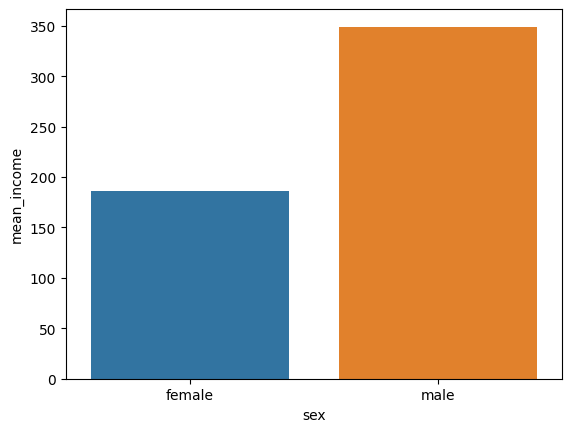

In [22]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

## 3. 나이와 월급의 관계
- Q. 몇 살 때 월급을 가장 많이 받을까?

In [23]:
welfare['birth'].dtypes

dtype('float64')

In [24]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

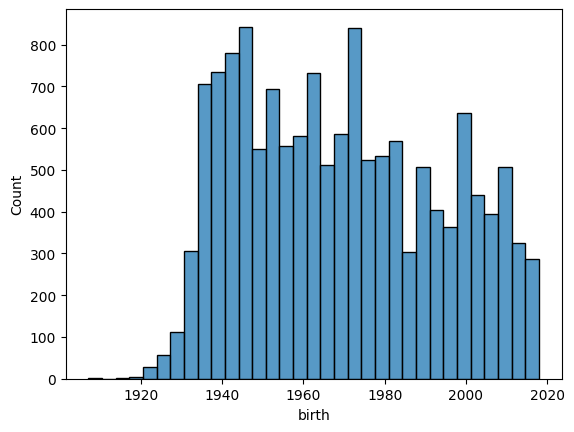

In [25]:
sns.histplot(data = welfare, x='birth')

In [26]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [27]:
welfare['birth'].isna().sum()

0

In [28]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

In [29]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

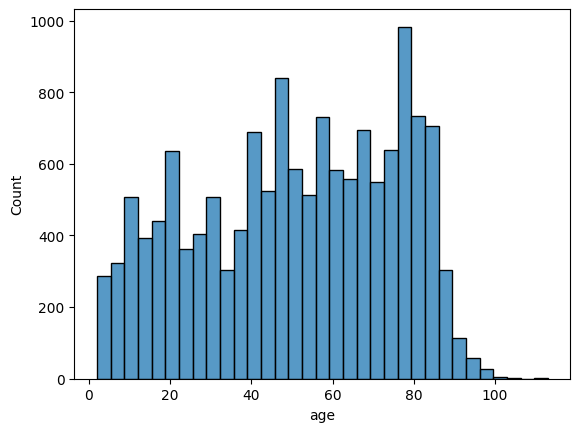

In [30]:
sns.histplot(data=welfare, x='age')

In [31]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

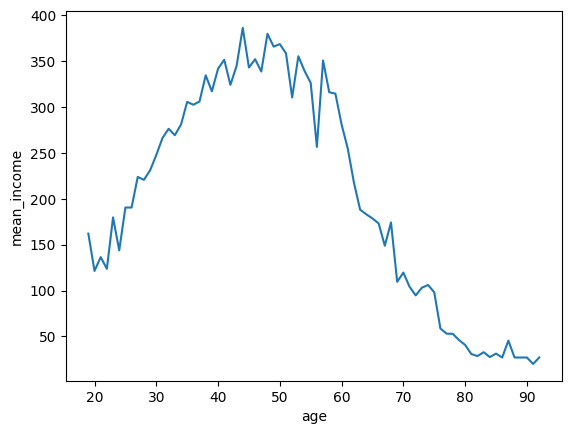

In [32]:
sns.lineplot(data=age_income, x='age', y='mean_income')

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_96372/19458693.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=welfare, x='age', y='income', ci=None)


<Axes: xlabel='age', ylabel='income'>

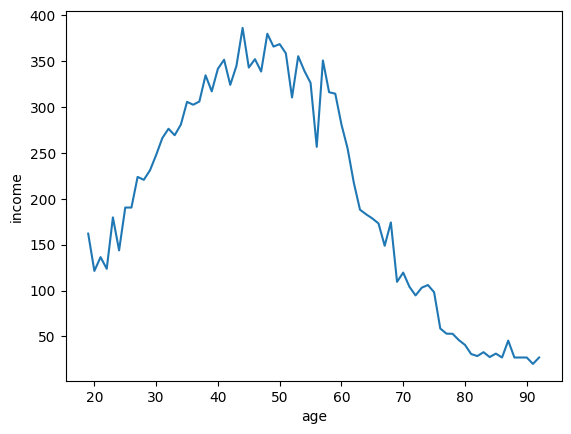

In [33]:
sns.lineplot(data=welfare, x='age', y='income', ci=None)

## 4. 연령대에 따른 월급 차이
- Q. 어떤 연령대의 월급이 가장 많을까?

In [34]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [35]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] < 60, 'middle', 'old')))

welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

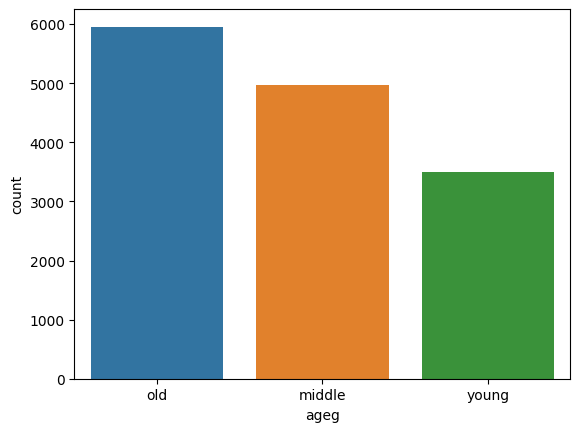

In [36]:
sns.countplot(data = welfare, x='ageg')

<Axes: xlabel='ageg', ylabel='count'>

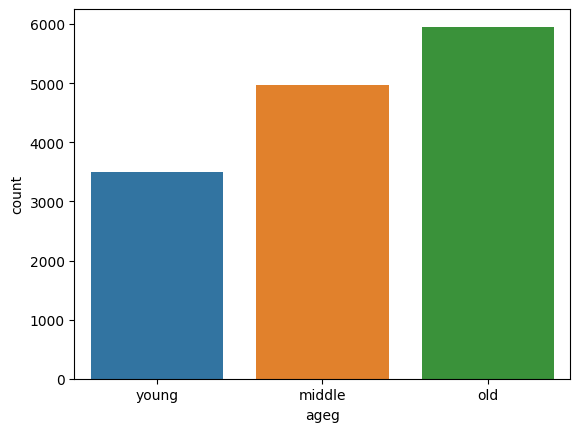

In [37]:
sns.countplot(data = welfare, x='ageg', order=['young', 'middle', 'old'])

In [38]:
ageg_income = welfare.dropna(subset=['income']) \
                     .groupby('ageg', as_index=False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

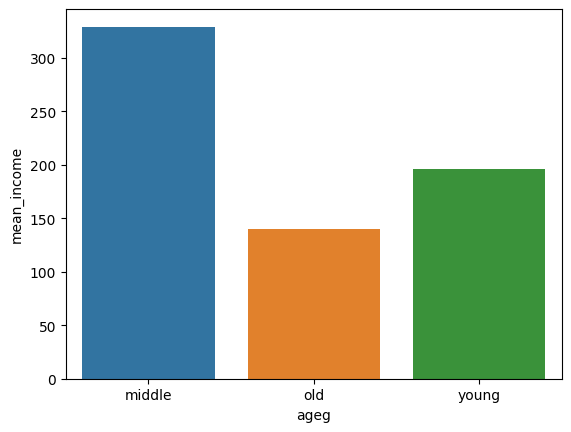

In [39]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

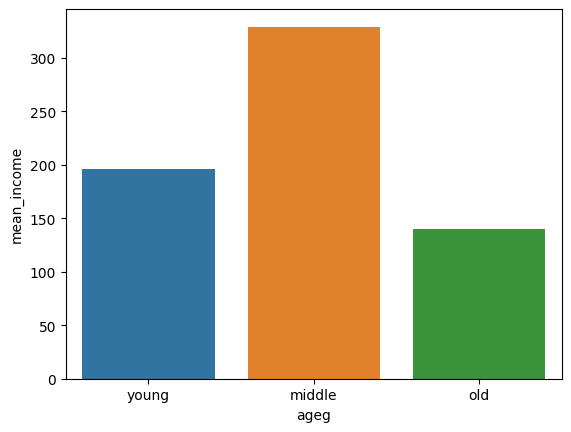

In [40]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

## 5. 연령대 및 성별 월급 차이
- 성별 월급 차이는 연령대별로 다를까?

In [41]:
sex_income = \
    welfare.dropna(subset = ['income']) \
           .groupby(['ageg', 'sex'], as_index=False) \
           .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

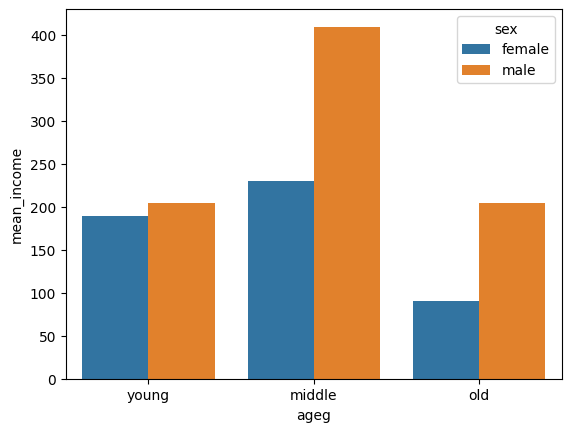

In [42]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [43]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

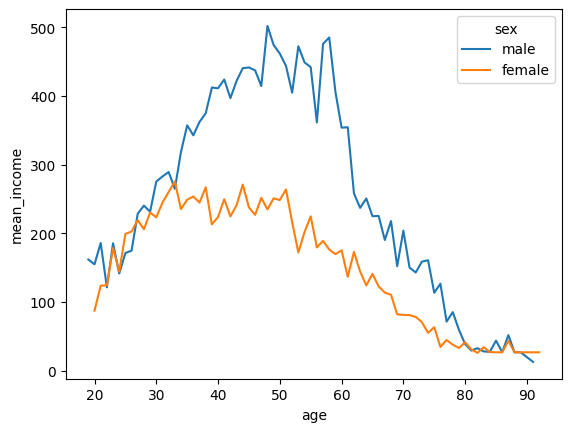

In [44]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [45]:
sex_age['mean_income'].max()

501.7936507936508

<Axes: xlabel='age', ylabel='Count'>

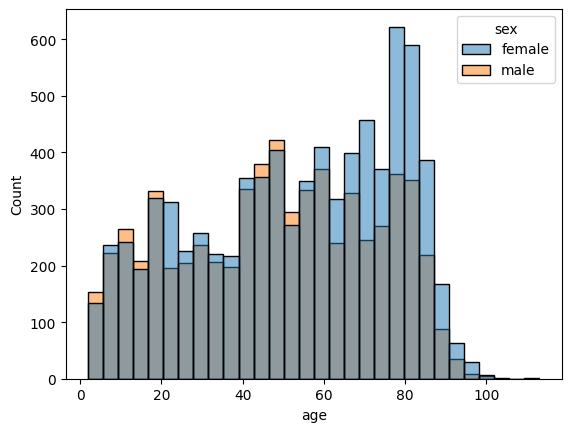

In [46]:
sns.histplot(data=welfare, x='age', hue='sex', bins=30)

In [47]:
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index=False) \
                 .agg(max_income = ('income', 'max'),
                      min_income = ('income', 'min'))
sex_age = sex_age.assign(diff = sex_age['max_income'] - sex_age['min_income'])
print(sex_age['diff'].max())
sex_age.query("diff == 1742")

1742.0


,age,sex,max_income,min_income,diff
58,48.0,male,1892.0,150.0,1742.0


## 6. 직업별 월급 차이
- 어떤 직업이 월급을 가장 많이 받을까?

In [48]:
welfare['code_job'].dtypes

dtype('float64')

In [49]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [50]:
list_job = pd.read_excel('../Data/Koweps_Codebook_2019.xlsx', sheet_name=1)
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [52]:
list_job.shape

(156, 2)

In [53]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [55]:
welfare['job'].head()

0            NaN
1            NaN
2            전기공
3    금속기계 부품 조립원
4            NaN
Name: job, dtype: object

In [56]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [57]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [58]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='mean_income', ylabel='job'>

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


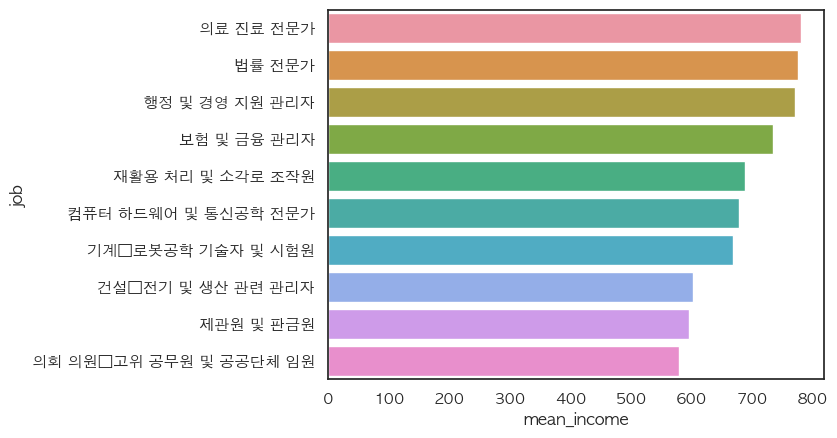

In [65]:
import matplotlib.pyplot as plt
sns.set(style="white", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data=top10, y='job', x='mean_income')

In [66]:
bottom10 = job_income.sort_values('mean_income', ascending=True).head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


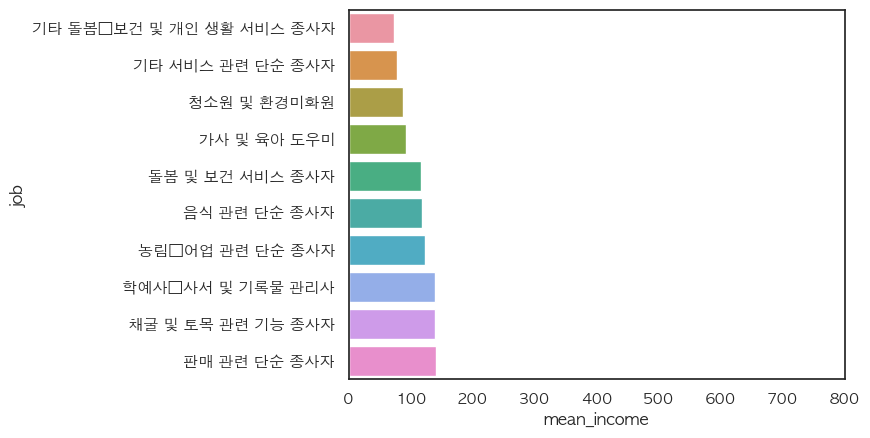

In [71]:
sns.set(style="white", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0,800))

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_96372/3221671374.py:13: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  plt.tight_layout()
/Users/min_leon/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


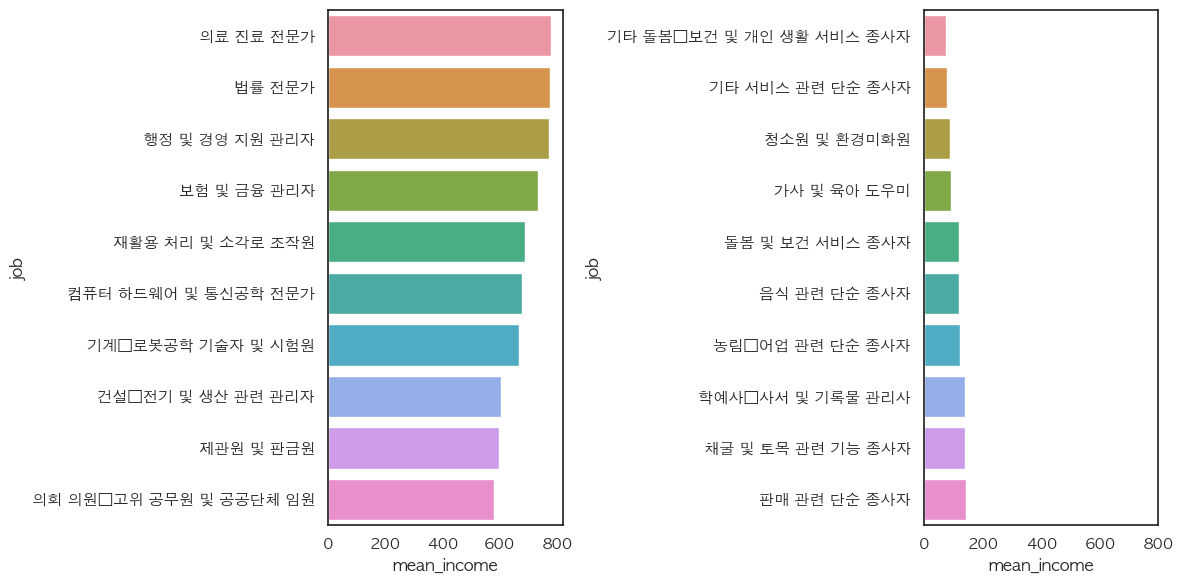

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.set(style="white", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data=top10, y='job', x='mean_income')

plt.subplot(1, 2, 2)
sns.set(style="white", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0,800))


plt.tight_layout()
plt.show()

## 7. 성별 직업 빈도
- 성별로 어떤 직업이 가장 많을까?

In [81]:
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending=True) \
                  .head(10)
job_male

,job,n
0,가사 및 육아 도우미,1
142,혼례 및 장례 종사자,1
139,학예사∙사서 및 기록물 관리사,1
132,통계 관련 사무원,1
126,철도운송 관련 종사자,1
51,문화∙예술 관련 기획자 및 매니저,1
54,발전 및 배전장치 조작원,1
87,연구∙교육 및 법률 관련 관리자,2
21,금융 및 보험 전문가,2
95,음료제조관련기계조작원,2


In [83]:
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending=False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [82]:
job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index=False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending=True) \
                  .head(10)
job_female

,job,n
95,통계 관련 사무원,1
21,기타 기계 조작원,1
86,정보 시스템 및 웹 운영자,1
25,기타 식품가공 관련 기계 조작원,1
26,기타 전문 서비스 관리자,1
84,전기∙전자 부품 및 제품 제조 장치 조작원,1
34,목재∙가구∙악기 및 간판 관련 기능 종사자,1
36,문화∙예술 관련 관리자,1
79,임업 관련 종사자,1
45,부사관,1


In [89]:
job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index=False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending=False) \
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

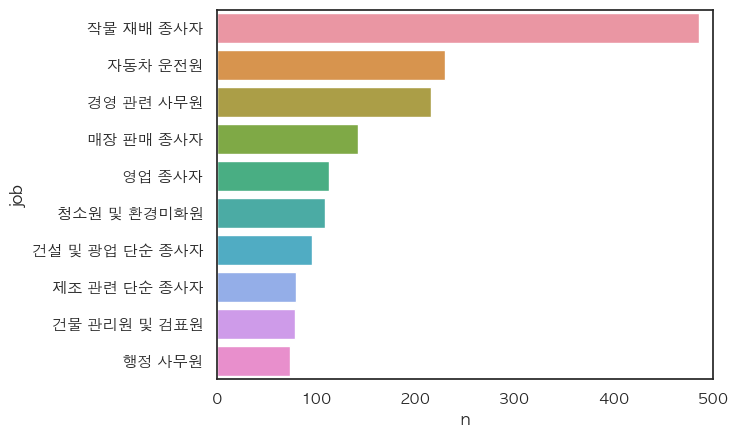

In [84]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 500))

[(0.0, 500.0)]

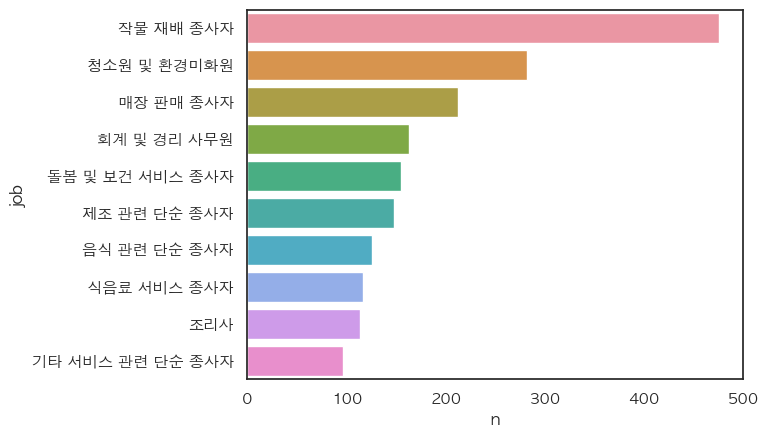

In [90]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500))

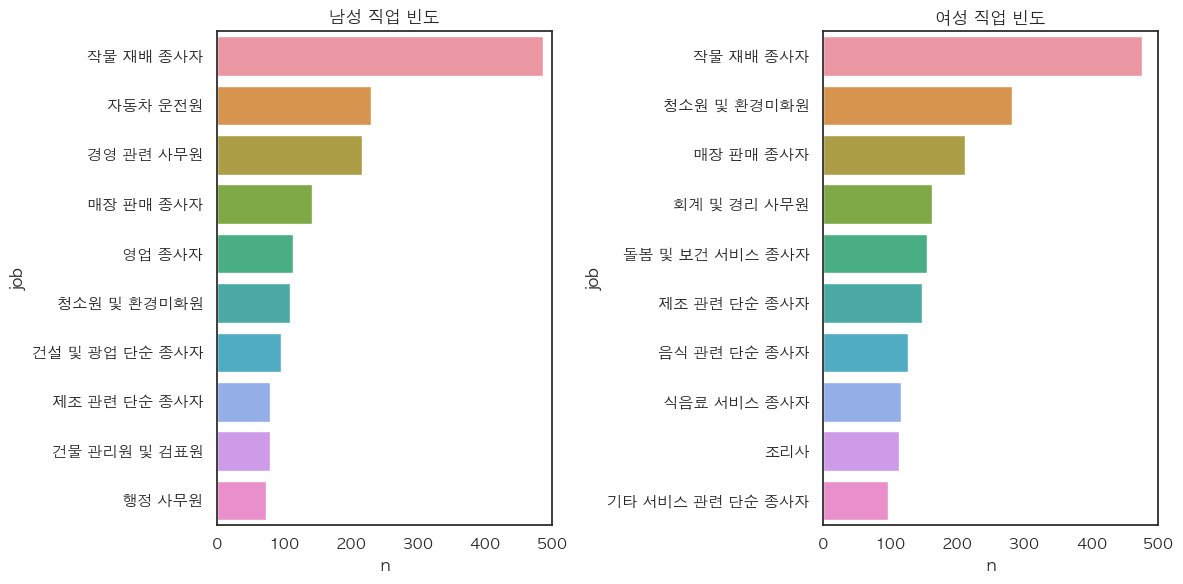

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('남성 직업 빈도')
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0, 500))

plt.subplot(1, 2, 2)
plt.title('여성 직업 빈도')
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500))

plt.tight_layout()
plt.show()